In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset

In [2]:
df=pd.read_excel(r'C:\Users\komal ramesh sapkal\Dropbox\Project\TPPS_Perf.xlsx')

In [3]:
print(df.head().to_latex())

\begin{tabular}{lrllrrrrrrlrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
{} &   MW &   Station &     Months &      MUG &       PLFC &    AFC &          L &   PLFM &   AVFM &  Oil Cons &   Total &        SOC &   TOC &         OC &     FO &    FO1 &  FO2 &   FO3 &     PO &     UO &     OO &   RSD &  RSD1 &  RSD2 &  RSD3 &  RSD4 &     CR &        CC &       SCC &     GCV &      HR &    TL &  SRWC &  SFWC &  SDWC &   SLOC &     MUL &   R1 &  R11 &      R2 &   R3 &   R4 &      AC &        PAC &       NG \\
\midrule
0 &  420 &  Bhusawal & 2011-04-30 &  237.404 &  78.506614 &  95.97 &  81.803286 &  84.14 &  84.14 &  Oil Cons &   583.0 &   2.455729 &  1.59 &   6.697444 &   4.04 &   1.04 &  0.0 &  3.00 &   0.00 &   0.00 &   0.00 &  0.00 &   0.0 &   0.0 &  0.00 &   0.0 &  81.80 &  206895.0 &  0.871489 &  3101.0 &  2725.0 &  1.64 &  5.88 &  2.20 &  0.08 &  0.019 &   0.000 &  0.0 &  0.0 &   0.000 &  0.0 &  0.0 &  24.041 &  10.126620 &  213.363 \\
1 &  420 &  Bhusawal & 2011-05-31 &  213.522 &  68.

In [4]:
data=df[['MUG','PLFC', 'AFC', 'L', 'PLFM', 'AVFM', 'CC', 'AC','NG']]

In [5]:
!pip install fsspec
!pip install boto
import boto

In [6]:
X=data[['MUG','PLFC', 'AFC', 'L', 'PLFM', 'AVFM', 'CC', ]]
Y=data[['AC','NG']]

## Standardize the data

In [8]:
X_mc=(X-X.mean())/(X.std())
X_mc.head()

,MUG,PLFC,AFC,L,PLFM,AVFM,CC
0,-0.507107,0.912837,0.775432,0.532071,0.964256,0.767713,-0.459003
1,-0.591475,0.424385,0.369227,0.354634,0.363989,0.192354,-0.538417
2,-0.542999,0.751553,0.705170,0.403865,0.645946,0.462612,-0.487932
3,-0.744678,-0.241833,-0.194629,0.054327,-0.253124,-0.399152,-0.697911
4,-0.857742,-0.733504,-0.073426,-0.890625,-0.716403,-0.843207,-0.781953


In [9]:
Y_mc=(Y-Y.mean())/(Y.std())
Y_mc.head()

,AC,NG
0,-0.623475,-0.500016
1,-0.661841,-0.588707
2,-0.615071,-0.540102
3,-0.789523,-0.744235
4,-0.810513,-0.865991


## Fit the CCA and Transformtion

In [10]:
from sklearn.cross_decomposition import CCA
my_cca = CCA(n_components=2)
my_cca.fit(X, Y)
X_c, Y_c = my_cca.transform(X_mc, Y_mc)

## Canonical Variates

In [12]:
cc_res=pd.DataFrame({"CCX_1":X_c[:,0],"CCY_1":Y_c[:,0],"CCX_2":X_c[:,1],"CCY_2":Y_c[:,1]})
cc_res

,CCX_1,CCY_1,CCX_2,CCY_2
0,-1.415159,-1.468931,-0.405678,-0.309355
1,-1.415521,-1.469414,-0.399177,-0.310484
2,-1.415353,-1.469055,-0.400666,-0.308901
3,-1.416137,-1.470483,-0.393257,-0.314727
4,-1.416915,-1.471029,-0.377586,-0.315091
...,...,...,...,...
428,-1.418720,-1.475318,-0.414565,-0.338654
429,-1.418720,-1.475424,-0.414565,-0.339862
430,-1.418720,-1.475427,-0.414565,-0.339900
431,-1.418720,-1.475459,-0.414565,-0.340259


## Covariance Matrix

In [13]:
np.corrcoef(X_c[:,0],Y_c[:,0])

array([[1.        , 0.98558904],
       [0.98558904, 1.        ]])

In [14]:
np.corrcoef(X_c[:,1],Y_c[:,1])

array([[ 1.       , -0.1041016],
       [-0.1041016,  1.       ]])

## Plot

Text(0.5, 1.0, 'Comp.1,corr=0.99')

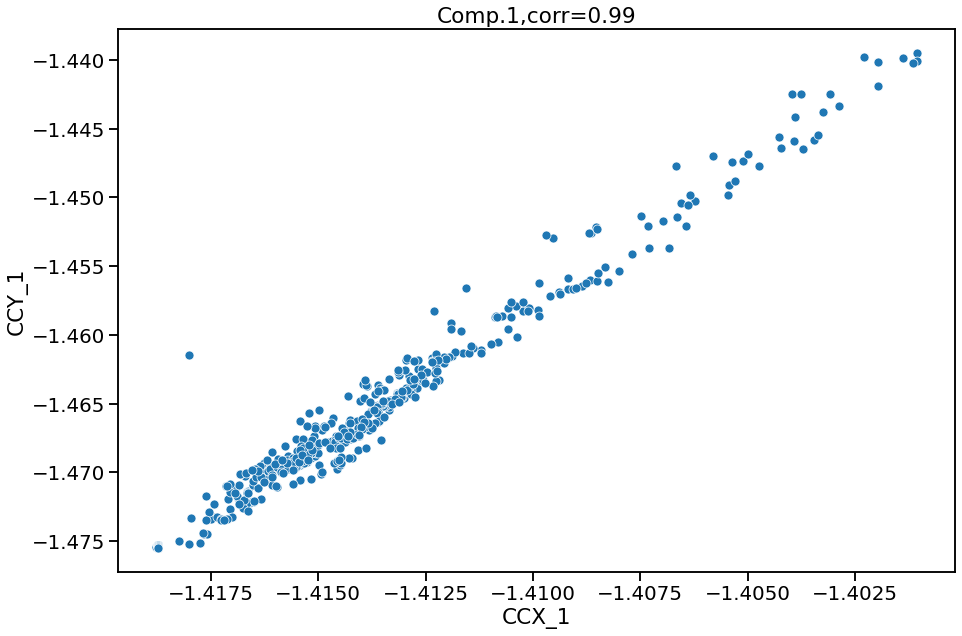

In [17]:
sns.set_context("talk",font_scale=1.2)
plt.figure(figsize=(15,10))
sns.scatterplot(x="CCX_1",y="CCY_1",data=cc_res)
plt.title('Comp.1,corr=%.2f'%np.corrcoef(X_c[:,0],Y_c[:,0])[0,1])